# Perceptron

Perceptron training
training data shape: (200, 3), training label shape: (200, 3)


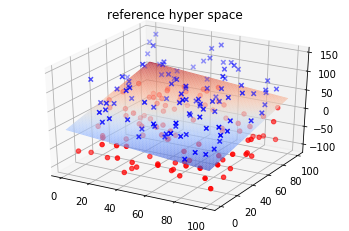

Data points generated
iter1, sample0: W = [6.77816537 3.11795882 5.17405246], b = 0.1, prediction = 0.0, true label = 1.0
iter2, sample0: prediction = 824.4601185071871, true label = 1.0, classification correct.
iter2, sample1: prediction = 957.0035641666278, true label = 1.0, classification correct.
iter2, sample2: prediction = 924.685104577913, true label = 1.0, classification correct.
iter2, sample3: prediction = 879.3184649695582, true label = 1.0, classification correct.
iter2, sample4: prediction = 354.3167411965846, true label = 1.0, classification correct.
iter2, sample5: prediction = 662.7153255168578, true label = 1.0, classification correct.
iter2, sample6: prediction = 964.9779191945294, true label = 1.0, classification correct.
iter2, sample7: prediction = 1041.7532775998334, true label = 1.0, classification correct.
iter2, sample8: prediction = 956.9284363018768, true label = 1.0, classification correct.
iter2, sample9: prediction = 1261.939210811617, true label = 1.0, cl

iter27, sample8: prediction = 3151.027671155063, true label = 1.0, classification correct.
iter27, sample9: prediction = 865.1420850793717, true label = 1.0, classification correct.
iter27, sample10: prediction = 2552.8393617203305, true label = 1.0, classification correct.
iter27, sample11: prediction = 1248.802860674029, true label = 1.0, classification correct.
iter27, sample12: prediction = 1576.5159147781192, true label = 1.0, classification correct.
iter27, sample13: prediction = 2913.061737756745, true label = 1.0, classification correct.
iter27, sample14: W = [ 13.10583473 -19.52087614  31.22221726], b = 0.5, prediction = -299.7813805161498, true label = 1.0
iter28, sample0: prediction = 1895.636173209643, true label = 1.0, classification correct.
iter28, sample1: prediction = 2354.8122360314987, true label = 1.0, classification correct.
iter28, sample2: prediction = 2088.0968176661368, true label = 1.0, classification correct.
iter28, sample3: prediction = 1942.9957897442482, 

iter45, sample7: prediction = 3551.0217360689744, true label = 1.0, classification correct.
iter45, sample8: prediction = 3736.1732824461183, true label = 1.0, classification correct.
iter45, sample9: prediction = 1579.722187926466, true label = 1.0, classification correct.
iter45, sample10: prediction = 3052.289584751613, true label = 1.0, classification correct.
iter45, sample11: prediction = 2219.028048417038, true label = 1.0, classification correct.
iter45, sample12: prediction = 2276.5839351407813, true label = 1.0, classification correct.
iter45, sample13: prediction = 3641.383150784868, true label = 1.0, classification correct.
iter45, sample14: prediction = 429.7213526203206, true label = 1.0, classification correct.
iter45, sample15: prediction = 289.180364695671, true label = 1.0, classification correct.
iter45, sample16: prediction = 205.57262015779037, true label = 1.0, classification correct.
iter45, sample17: prediction = 3329.2221714446296, true label = 1.0, classificat

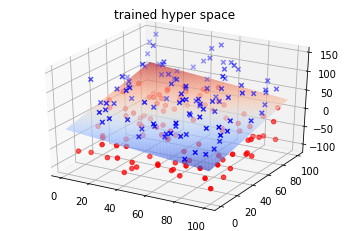

done.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

np.random.seed(0)

class Perceptron:
    
    def __init__(self, positive_count=100, negative_count=100, init_W=[1,-2,3], init_b=4):
        self._positive_count = positive_count
        self._negative_count = negative_count
        self._init_W = init_W
        self._init_b = init_b
      
    def randrange(self, n, vmin, vmax):
        return (vmax - vmin) * np.random.rand(n) + vmin
    
    def calculate_z(self, W, b, x, y):
        '''calculate z in a plane 3d space given the x, y value.'''
        assert W[2] != 0, "init_W[2] cannot be 0 in this case!"
        z = -(W[0] * x + W[1] * y + b) / W[2]
        return z
    
    def calculate_hyper_plane(self, w, b):
        vec = np.arange(0, 100, 1)
        x, y = np.meshgrid(vec, vec)
        z = self.calculate_z(w, b, x, y)
        return (x, y, z)
    
    def show(self, data_pos, data_neg, W, b, title=""):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data_pos[:,0], data_pos[:,1], data_pos[:,2], c="b", marker='x')
        ax.scatter(data_neg[:,0], data_neg[:,1], data_neg[:,2], c="r", marker='o')

        hyper_plane = self.calculate_hyper_plane(W, b)
        ax.plot_surface(hyper_plane[0], hyper_plane[1], hyper_plane[2], rstride=1, cstride=1, alpha=0.8, cmap=plt.cm.coolwarm)
        ax.set_title(title)
        plt.show()
    
    def generate_data(self):
        '''generate data point that will seprated by plane defined by init_W*X + init_b'''
        t_pos = self.randrange(self._positive_count, 0, 100)
        x_pos = self.randrange(self._positive_count, 0, 100)
        y_pos = self.randrange(self._positive_count, 0, 100)
        z_pos = self.calculate_z(self._init_W, self._init_b, x_pos, y_pos) + t_pos

        t_neg = self.randrange(self._negative_count, 0, 100)
        x_neg = self.randrange(self._negative_count, 0, 100)
        y_neg = self.randrange(self._negative_count, 0, 100)
        z_neg = self.calculate_z(self._init_W, self._init_b, x_neg, y_neg) - t_neg
        
        data_pos = np.zeros((self._positive_count, 3))
        data_pos[:, 0] = x_pos
        data_pos[:, 1] = y_pos
        data_pos[:, 2] = z_pos
        label_pos = np.ones(self._positive_count)
        
        data_neg = np.zeros((self._negative_count, 3))
        data_neg[:, 0] = x_neg
        data_neg[:, 1] = y_neg
        data_neg[:, 2] = z_neg
        label_neg = -np.ones(self._negative_count)
        
        self._train_data = np.concatenate([data_pos, data_neg])
        self._train_label = np.concatenate([label_pos, label_neg])

        print(f"training data shape: {self._train_data.shape}, training label shape: {self._train_data.shape}")
        #idx_list = np.array(range(train_Y.shape[0]))
        #np.random.shuffle(idx_list)
        #print(idx_list, idx_list.shape)
        self._data_pos = data_pos
        self._data_neg = data_neg
        self.show(data_pos, data_neg, self._init_W, self._init_b, "reference hyper space")
        print("Data points generated")
       
    
    def train(self, lr=0.1):
        W = [0, 0, 0]
        b = 0
        
        idx_list = np.array(range(self._train_label.shape[0]))
        misclassified_flag = True
        iter = 0
        #iter < 100 to avoid infinity loop in linear unseprable case
        while misclassified_flag:
            misclassified_flag = False
            #np.random.shuffle(idx_list)
            iter += 1
            for i in idx_list:
                y = np.dot(W, self._train_data[i]) + b
                if y * self._train_label[i] <= 0:
                    W += lr * self._train_label[i]*self._train_data[i]
                    b += lr * self._train_label[i]
                    print(f"iter{iter}, sample{i}: W = {W}, b = {b}, prediction = {y}, true label = {self._train_label[i]}")
                    misclassified_flag = True
                    break
                else:
                    print(f"iter{iter}, sample{i}: prediction = {y}, true label = {self._train_label[i]}, classification correct.")    
                    pass
        print(f"training result after {iter} iteration: W = {W}, b = {b}")
        self.show(self._data_pos, self._data_neg, W, b, "trained hyper space")
        

print("Perceptron training")  
p = Perceptron()
p.generate_data()
p.train()  
print("done.")                           
        